# CUSTOMER SEGMENTATION

Done by : Shah Yash Mahesh - 20MIA1028

I. Introduction

II. Background -
This project is about customer segmentation. Wherein, we divide the customers into segments based on their characteristics and apply a ‘personalized targeting’ technique to take the market to the customers effectively. The segments help us to optimize the significance of each customer to the business, hence modifying specific products and the market to the needs of the customer. Demographics, behaviour, benefit groups, social data of the customers and the value of the products are some of the ways which help segment customers effectively in the given data.

III . Motivation -
The motivation of Personalized targeting involves specific product data and behavioural characteristics to determine which group/segment of people increases or decreases the product value in the market, which group ensures more profit in a given time period and applying special strategies to increase sales in the respective sector. The segments also help us to get proper feedback on what the customers need and cater to their needs. These segments can be formed with the help of techniques like Statistical Analysis, Outlier Analysis, Clustering and Apriori algorithms 

IV. Statement- 
We have taken a groceries firm’s database wherein we are going to clean the data for anomalies, outliers and errors, pre-process it, reduce the dimensionality to get a detailed look of the sectors about to be grouped, creating segments from the behaviour, evaluate the clusters using visualization with certain criteria’s and pattern arrangement, profile the data and end with conclusions about each cluster we have. This entire process will give a solution to bring the products to the market by the needs of the customer, target the sales pitch on the required cluster and to cater to the needs of every cluster and their uses.

V. Challenges -
The challenges faced by author includes cleaning the data before being used for analysis, extracting features from the processed data necessary for analysis and reducing the dimensionality of data down to four important features . Analysing the final results to draw appropriate conclusions.


Data –

Our dataset contains the following features :

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household

Teenhome - number of teenagers in customer’s household

Income - customer’s yearly household income

MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase

We would be performing clustering on the basis of the spending, seniority and family size of customers. Whereas we would also be using apriori algorithm to predict common patterns of buying among customers from above data.


In [401]:
# Topics Covered: Data cleaning, visualisation of the required columns/items, feature engineering
# Clustering and KMeans, outlier analysis, SNS plots, Apriori algorithm to find patterns
# PCA, subplots, scatter plots and barplot visualization, Machine Learning 

In [402]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandoc

In [403]:
# https://www.kaggle.com/rodsaldanha/arketing-campaign

In [404]:
df=pd.read_csv("marketing_campaign.csv", sep=";")

In [405]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [407]:
#object
#non null income 24 values
# datatype for date

In [408]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [409]:
# there are missing values in income (24 values)
#some categorical values are in form of objects . we will need to change them
#DT_customer should be date time value
#education can be made numerical for easier analysis
#martial status can be made numerical
#z_costcontact and z_revenue seem to have constant data so we can drop it

In [410]:
df["Income"].value_counts().sort_index().head()

1730.000    1
2447.000    1
3502.000    1
4023.000    1
4428.000    1
Name: Income, dtype: int64

In [411]:
# we notice that income doesnt have any 0 which is unusual generally 
# also the rest of the variables are present except income for particular ids 
# so we can safely replace null values with 0 indicating no income for the given data

In [412]:
df["Income"].fillna(0,inplace=True)
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [413]:
# with missing value treated we can move further to explore our data

In [414]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])

In [415]:
print("The last customer recorded was on -",df["Dt_Customer"].max())
print("The first customer recorded was on -",df["Dt_Customer"].min())

The last customer recorded was on - 2014-06-29 00:00:00
The first customer recorded was on - 2012-07-30 00:00:00


In [416]:
# Before cleaning of the columns martial status and education for proper analysis

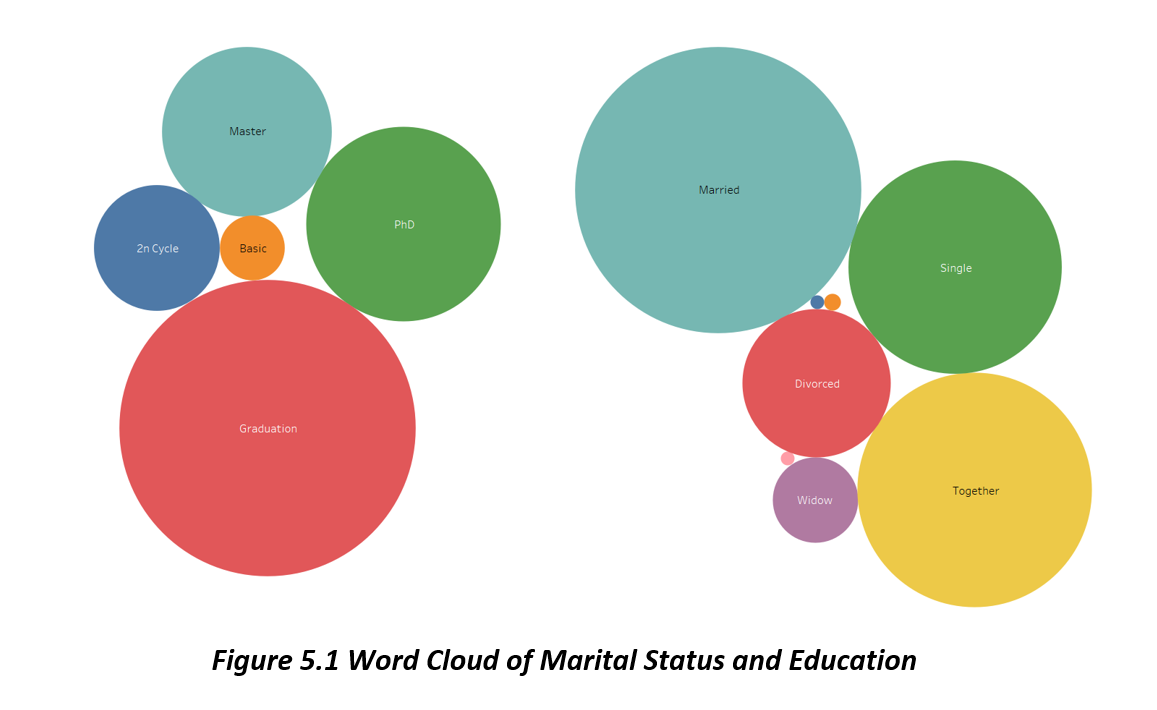

### Word Cloud created using Tableau

In [417]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [418]:
# we notice that there are lot of bad values in marital status . we will first need to clean them
# Cleaning involves creating a new column and grouping married and together values aas partner and the rest all as alone

In [419]:
marital_dict={"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",}
df["Living_With"]=df["Marital_Status"].replace(marital_dict)

In [420]:
df['Living_With'].value_counts()

Partner    1444
Alone       796
Name: Living_With, dtype: int64

In [421]:
df["Marital_Status"]=df["Marital_Status"].replace({"Alone":"Single","Absurd":"Single","YOLO":"Single"})

In [422]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [423]:
# A table showing how many values have been grouped to alone and partner from each of the Marital status column

In [424]:
pd.crosstab(df["Marital_Status"],df["Living_With"])

Living_With,Alone,Partner
Marital_Status,,
Divorced,232,0
Married,0,864
Single,487,0
Together,0,580
Widow,77,0


Our dataset contains more couples as compared to singles

In [425]:
# Education also has more number of values which we are convert into three itemsets by grouping
# As graduate, postgraduate and undergraduate

In [426]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [427]:
#lets group these values by level to provide more clarity

In [428]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df["Education"].value_counts()

Graduate         1127
Postgraduate      856
Undergraduate     257
Name: Education, dtype: int64

Our dataset contains educated indivuals more. we can expect the income category to be on the higher side

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [430]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 3
Marital_Status            5
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Living_With               2
dtype: int64

In [431]:
# here we conclude cleaning the data 
# now we can move to see the basic distribution of data before we add features to our data

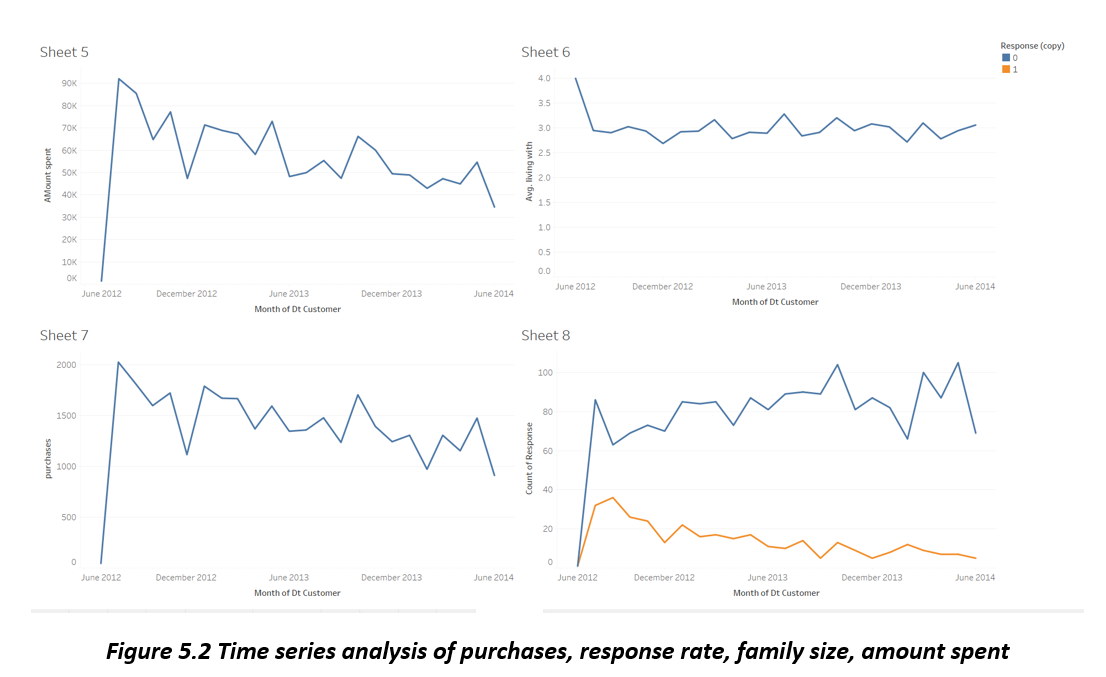

#### Created using Tableau

<AxesSubplot:>

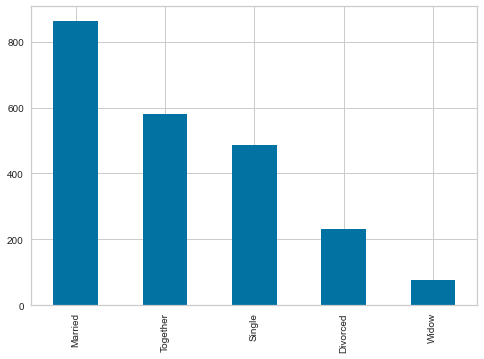

In [432]:
df['Marital_Status'].value_counts().plot(kind="bar")

<AxesSubplot:>

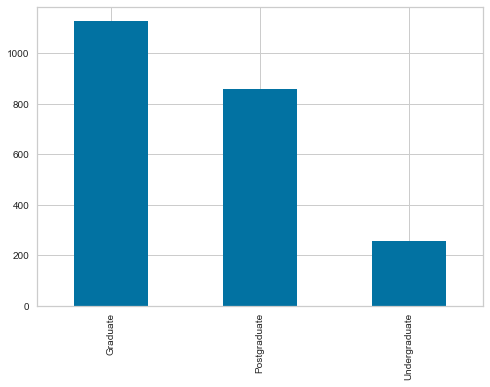

In [433]:
df["Education"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Frequency'>

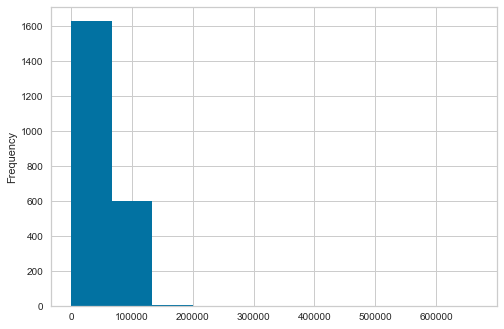

In [434]:
df.Income.plot(kind="hist")

<AxesSubplot:xlabel='Income'>

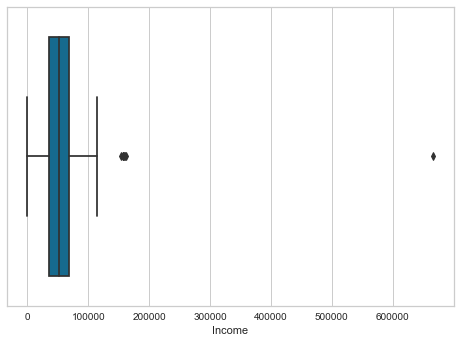

In [435]:
sns.boxplot(x=df['Income'])

In [436]:
# we seem to have some outliers in our income feature . we will look at them in further exploration later

In [437]:
#Contigency tables

In [438]:
pd.crosstab([df["AcceptedCmp1"],df["AcceptedCmp2"],df["AcceptedCmp3"],df["AcceptedCmp4"],df["AcceptedCmp5"]],df["Living_With"],margins=True,margins_name='Grand Total')

Living_With                                                       Alone  \
AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5          
0            0            0            0            0               631   
                                                    1                17   
                                       1            0                31   
                                                    1                 8   
                          1            0            0                53   
                                                    1                 1   
             1            0            0            0                 1   
                                       1            0                 2   
                                                    1                 2   
                          1            0            0                 0   
                                                    1                 1   
1            0            0            0            0                15   
                                                    1                 8   
                                       1            0                 6   
                                                    1                 8   
                          1            0            0                 4   
                                                    1                 3   
             1            0            1            0                 0   
                                                    1                 4   
                          1            0            1                 1   
Grand Total                                                         796   

Living_With                                                       Partner  \
AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5            
0            0            0            0            0                1146   
                                                    1                  42   
                                       1            0                  53   
                                                    1                  16   
                          1            0            0                  76   
                                                    1                   5   
             1            0            0            0                   0   
                                       1            0                   6   
                                                    1                   2   
                          1            0            0                   2   
                                                    1                   1   
1            0            0            0            0                  37   
                                                    1                  13   
                                       1            0                   8   
                                                    1                  15   
                          1            0            0                   4   
                                                    1                  10   
             1            0            1            0                   2   
                                                    1                   4   
                          1            0            1                   2   
Grand Total                                                          1444   

Living_With                                                       Grand Total  
AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5               
0            0            0            0            0                    1777  
                                                    1                      59  
                                       1            0                      84  
                                                    1                      24  
                      

In [439]:
# People prefer to accept 3rd offer more than others followed by 4th offer
# People in realtionships accept more offers than single people

([<matplotlib.patches.Wedge at 0x2673feaf1c0>,
 [Text(-0.981504079534704, 0.49663844178308797, '1'),
  Text(0.9815040562853797, -0.4966384877306091, '0')],
 [Text(-0.5353658615643839, 0.27089369551804793, '85%'),
  Text(0.5353658488829344, -0.2708937205803322, '15%')])

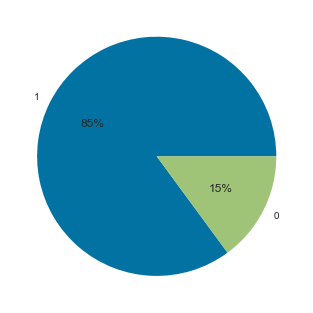

In [440]:
plt.pie(x=df["Response"].value_counts(), autopct='%.0f%%',labels=[1,0])

In [441]:
#85% of people responded no to our target variable
#dropped z_costContact and Z_revenue from main df
# No more analysis can be done

In [442]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [443]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericdf = df.select_dtypes(include=numerics)

#preparing dataframe for statistical analysis

In [444]:
numericdf.drop(["ID","Year_Birth","Kidhome","Teenhome","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response","Complain"],axis=1,inplace=True)

In [445]:
numericdf.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000
mean,51687.459,49.109,303.936,26.302,166.950,37.525,27.063,44.022,2.325,4.085,2.662,5.790,5.317
std,25609.343,28.962,336.597,39.773,225.715,54.629,41.280,52.167,1.932,2.779,2.923,3.251,2.427
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,34722.000,24.000,23.750,1.000,16.000,3.000,1.000,9.000,1.000,2.000,0.000,3.000,3.000
50%,51075.000,49.000,173.500,8.000,67.000,12.000,8.000,24.000,2.000,4.000,2.000,5.000,6.000
75%,68289.750,74.000,504.250,33.000,232.000,50.000,33.000,56.000,3.000,6.000,4.000,8.000,7.000
max,666666.000,99.000,1493.000,199.000,1725.000,259.000,263.000,362.000,15.000,27.000,28.000,13.000,20.000


In [446]:
#we can see on an average in recency a customer returns to store in every 50 days
#meat products beats its counter parts in average sales as well as maximum sale .
#indicating meat could be the most revenue generating product and we can target customers with high meat consumption more
#number of deals purchased from website and store is more . we can reduce focus on catalog purchases in future 

# Box plots helps visualize outliers in the Products column 
# Analyzing these outliers, we can find patterns within the ouliers of each plot and the can be used for further analysis

Income                    AxesSubplot(0.125,0.749828;0.227941x0.130172)
Recency                AxesSubplot(0.398529,0.749828;0.227941x0.130172)
MntWines               AxesSubplot(0.672059,0.749828;0.227941x0.130172)
MntFruits                 AxesSubplot(0.125,0.593621;0.227941x0.130172)
MntMeatProducts        AxesSubplot(0.398529,0.593621;0.227941x0.130172)
MntFishProducts        AxesSubplot(0.672059,0.593621;0.227941x0.130172)
MntSweetProducts          AxesSubplot(0.125,0.437414;0.227941x0.130172)
MntGoldProds           AxesSubplot(0.398529,0.437414;0.227941x0.130172)
NumDealsPurchases      AxesSubplot(0.672059,0.437414;0.227941x0.130172)
NumWebPurchases           AxesSubplot(0.125,0.281207;0.227941x0.130172)
NumCatalogPurchases    AxesSubplot(0.398529,0.281207;0.227941x0.130172)
NumStorePurchases      AxesSubplot(0.672059,0.281207;0.227941x0.130172)
NumWebVisitsMonth            AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

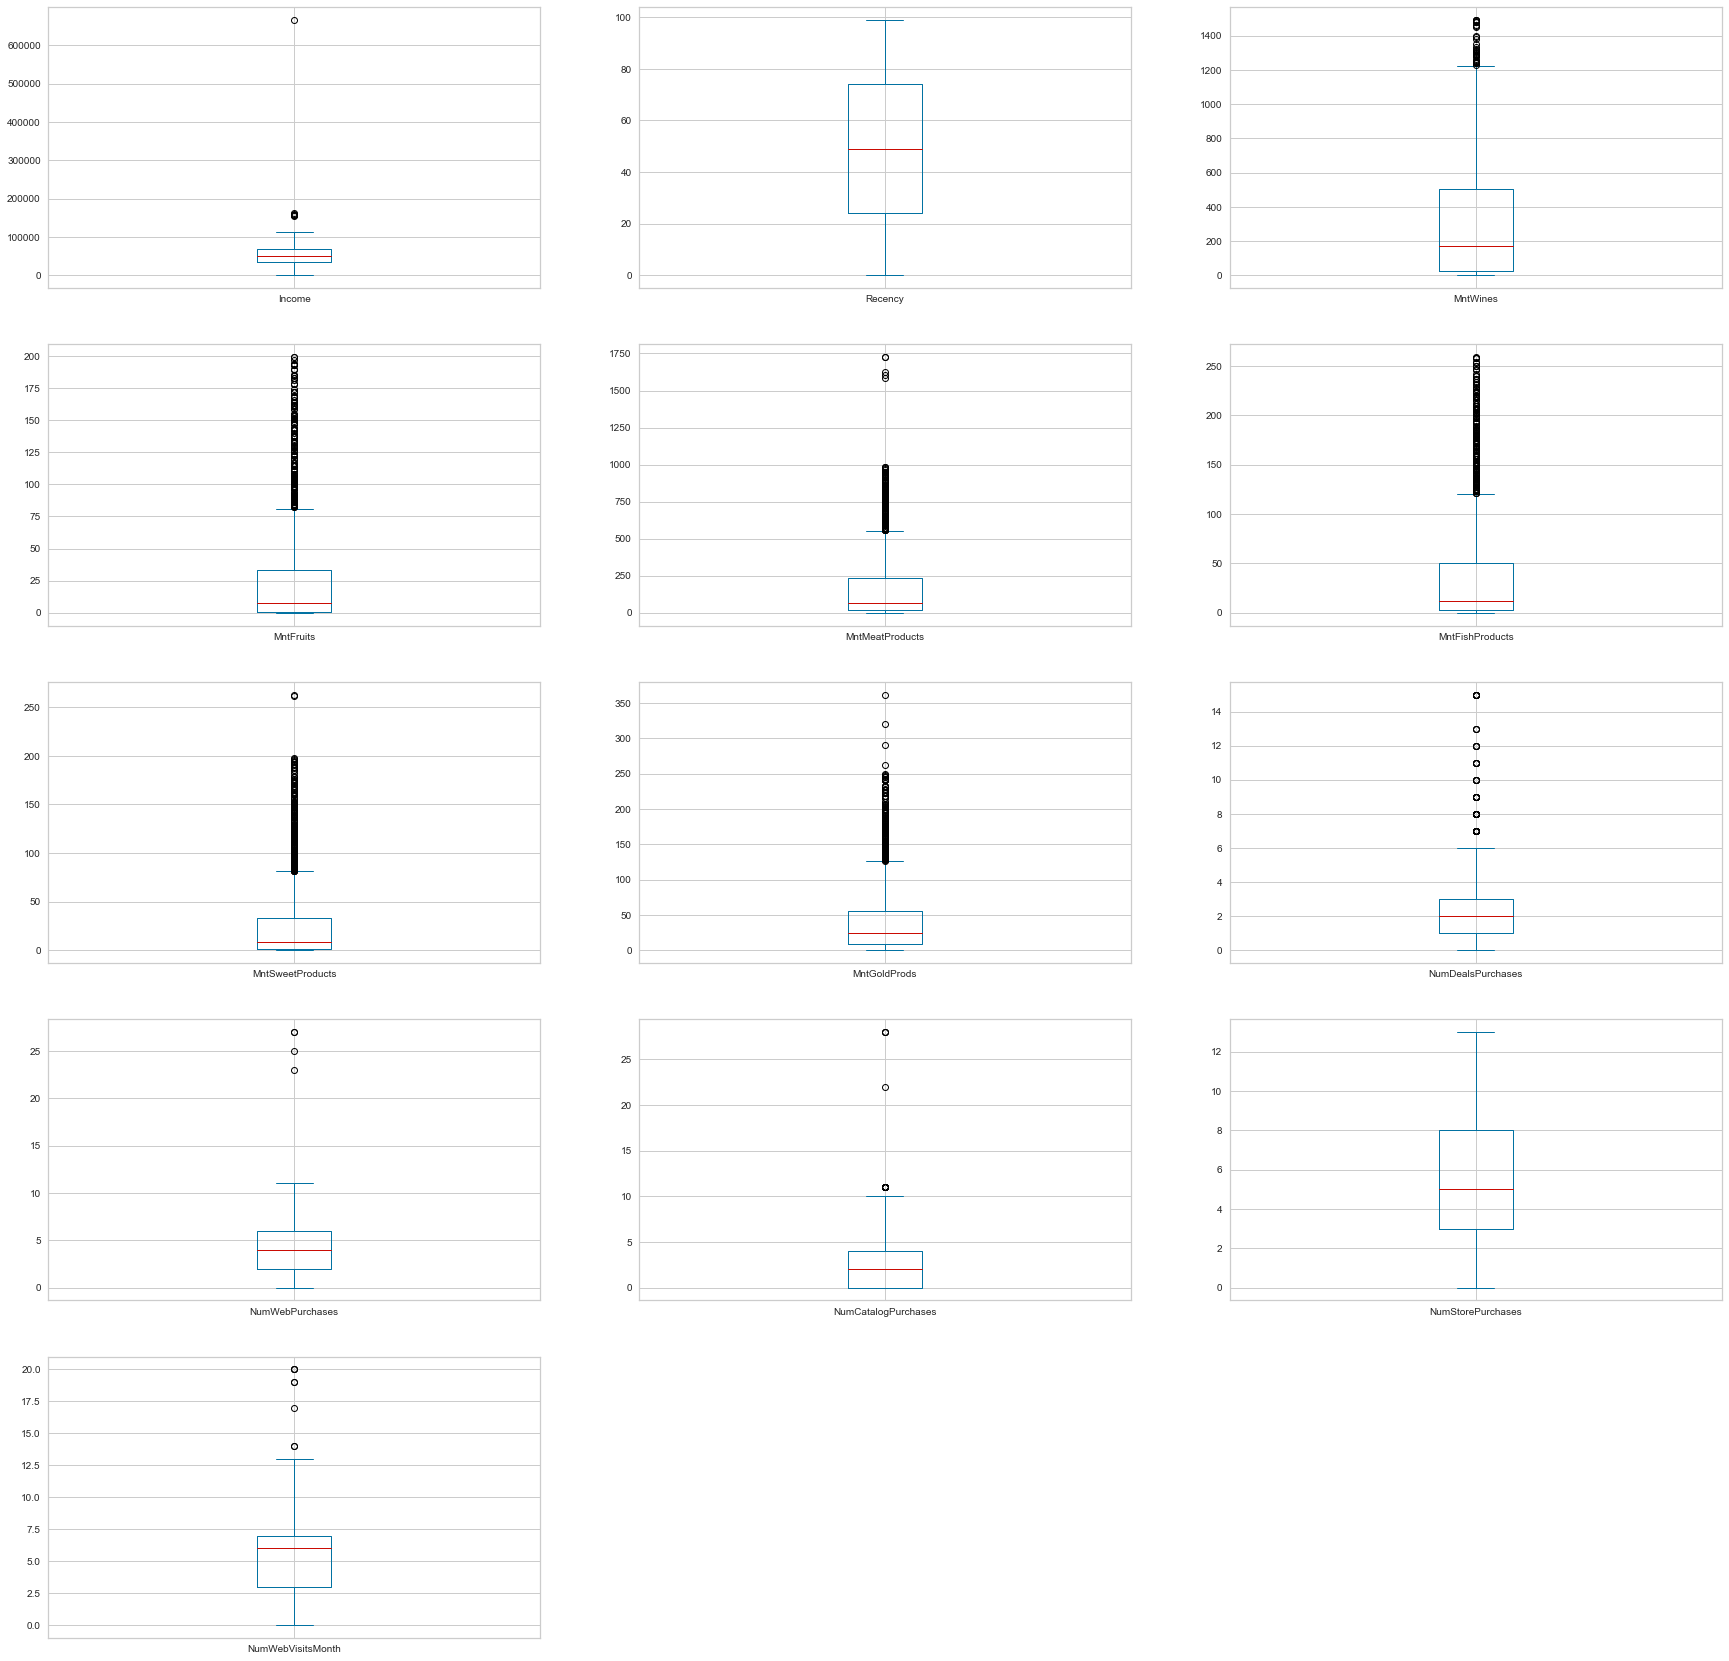

In [447]:
numericdf.plot(kind="box",subplots=True, layout=(5,3),figsize=(30,30))

We notice that our dataset contains alot of outliers in every field. Clustering can be pretty effective in grouping these datas together to find a relation among them in further analysis

In [448]:
numericdf.kurtosis()

Income                147.940
Recency                -1.202
MntWines                0.599
MntFruits               4.051
MntMeatProducts         5.517
MntFishProducts         3.096
MntSweetProducts        4.377
MntGoldProds            3.552
NumDealsPurchases       8.937
NumWebPurchases         5.703
NumCatalogPurchases     8.047
NumStorePurchases      -0.622
NumWebVisitsMonth       1.822
dtype: float64

In [449]:
numericdf.skew()

Income                 6.329
Recency               -0.002
MntWines               1.176
MntFruits              2.102
MntMeatProducts        2.083
MntFishProducts        1.920
MntSweetProducts       2.136
MntGoldProds           1.886
NumDealsPurchases      2.419
NumWebPurchases        1.383
NumCatalogPurchases    1.881
NumStorePurchases      0.702
NumWebVisitsMonth      0.208
dtype: float64

In [450]:
numericdf2=numericdf.drop("Income",axis=1)

In [451]:
#lets try to visualize the distribution based on kurtosis and skewness 

In [452]:
numericdf3=numericdf2.drop(["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"],axis=1)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

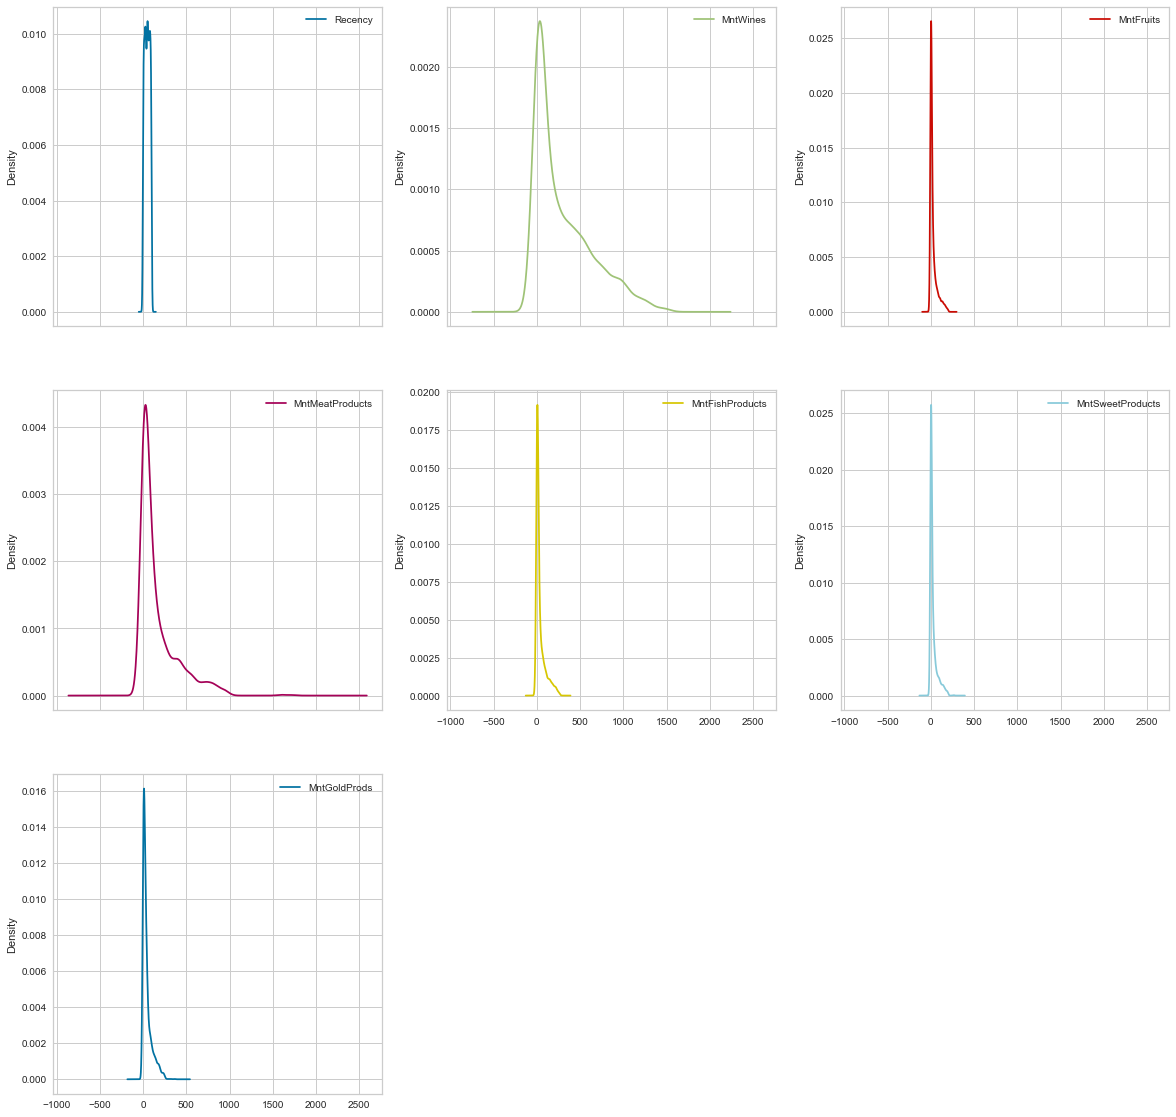

In [453]:
numericdf3.plot(kind='density',subplots=True,layout=(3,3),figsize=(20,20))

# The peaks seen in the plots shows similar kurtosis and we can analyze the overlapping values and outliers as such

In [454]:
numericdf4=df[["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]]

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

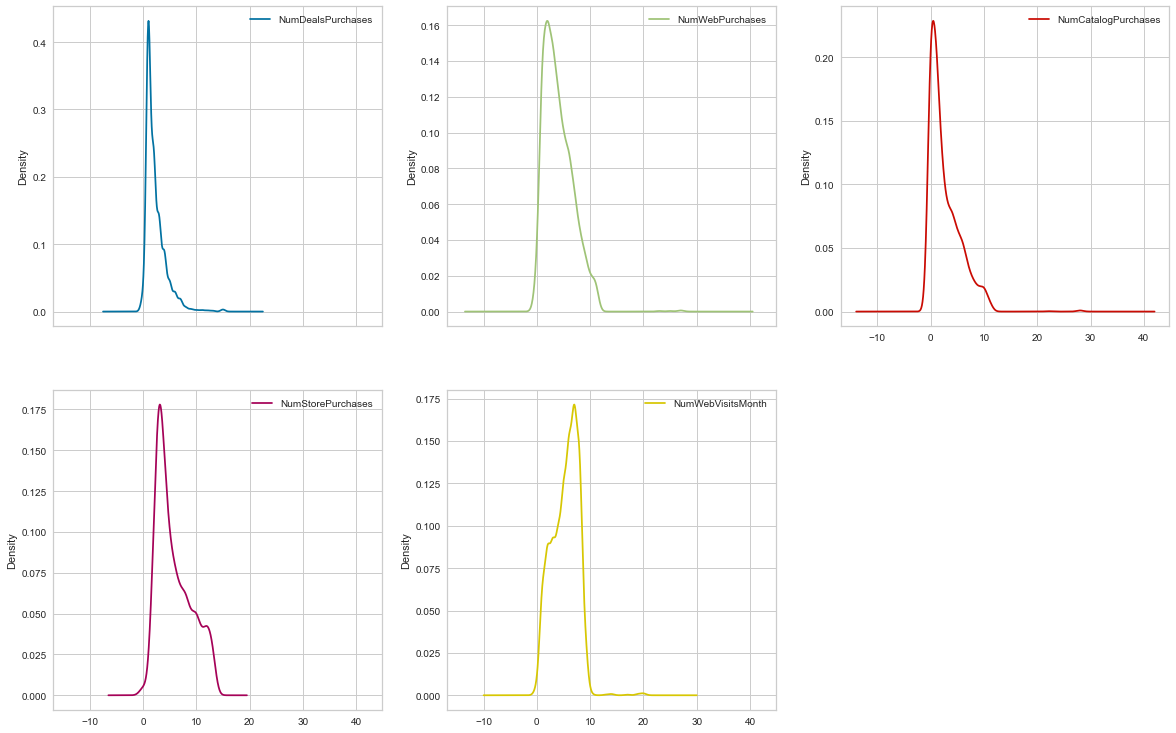

In [455]:
numericdf4.plot(kind='density',subplots=True,layout=(3,3),figsize=(20,20))

<AxesSubplot:ylabel='Density'>

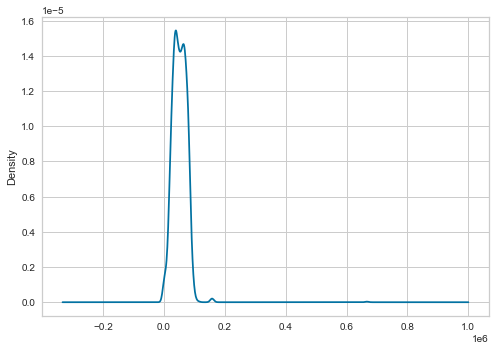

In [456]:
df["Income"].plot(kind="density")

1- Recency seems to be clustered at one point with not much variation in data

2- products seem to be right tailed . indicating the number of customer buying in large quantities are more than customers who buy limited items. this can be interpreted as a positive sign for the store as these high buying customers would usually be the target of any promotion or such.

3- number of store purchases and catalog purchases seem to get us more business than other modes

In [457]:
#Created a feature "Customer_For"
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i) 
days = []
d1 = max(dates) 
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [458]:
#Feature Engineering
#Age of customer today 
df["Age"] = 2022-df["Year_Birth"]

#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#children at home
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the household
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Feature showcasing parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [460]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000
mean,51687.459,0.444,0.506,49.109,303.936,26.302,166.950,37.525,27.063,44.022,2.325,4.085,2.662,5.790,5.317,0.073,0.075,0.073,0.064,0.013,0.009,0.149,30549497142857144.000,53.194,605.798,0.950,2.595,0.715
std,25609.343,0.538,0.545,28.962,336.597,39.773,225.715,54.629,41.280,52.167,1.932,2.779,2.923,3.251,2.427,0.260,0.263,0.260,0.245,0.115,0.096,0.356,17463385066913898.000,11.984,602.249,0.752,0.907,0.451
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,26.000,5.000,0.000,1.000,0.000
25%,34722.000,0.000,0.000,24.000,23.750,1.000,16.000,3.000,1.000,9.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,15616800000000000.000,45.000,68.750,0.000,2.000,0.000
50%,51075.000,0.000,0.000,49.000,173.500,8.000,67.000,12.000,8.000,24.000,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30715200000000000.000,52.000,396.000,1.000,3.000,1.000
75%,68289.750,1.000,1.000,74.000,504.250,33.000,232.000,50.000,33.000,56.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,45705600000000000.000,63.000,1045.500,1.000,3.000,1.000
max,666666.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,263.000,362.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,60393600000000000.000,129.000,2525.000,3.000,5.000,1.000


In [461]:
#there is one outlier in income and age, the outlier is of no use for future analysis

In [462]:
print(np.where(df.Income>500000))

(array([2233], dtype=int64),)


In [463]:
print(df.iloc[2233]) 
# iloc removes the respective index value of the outlier as gathered from the last step

Education                       Graduate
Income                        666666.000
Kidhome                                1
Teenhome                               0
Recency                               23
Wines                                  9
Fruits                                14
Meat                                  18
Fish                                   8
Sweets                                 1
Gold                                  12
NumDealsPurchases                      4
NumWebPurchases                        3
NumCatalogPurchases                    1
NumStorePurchases                      3
NumWebVisitsMonth                      6
AcceptedCmp3                           0
AcceptedCmp4                           0
AcceptedCmp5                           0
AcceptedCmp1                           0
AcceptedCmp2                           0
Complain                               0
Response                               0
Living_With                      Partner
Customer_For    

In [464]:
#as our income outlier doesnt have any special characteristic to it . we would be dropping it

In [465]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

<AxesSubplot:>

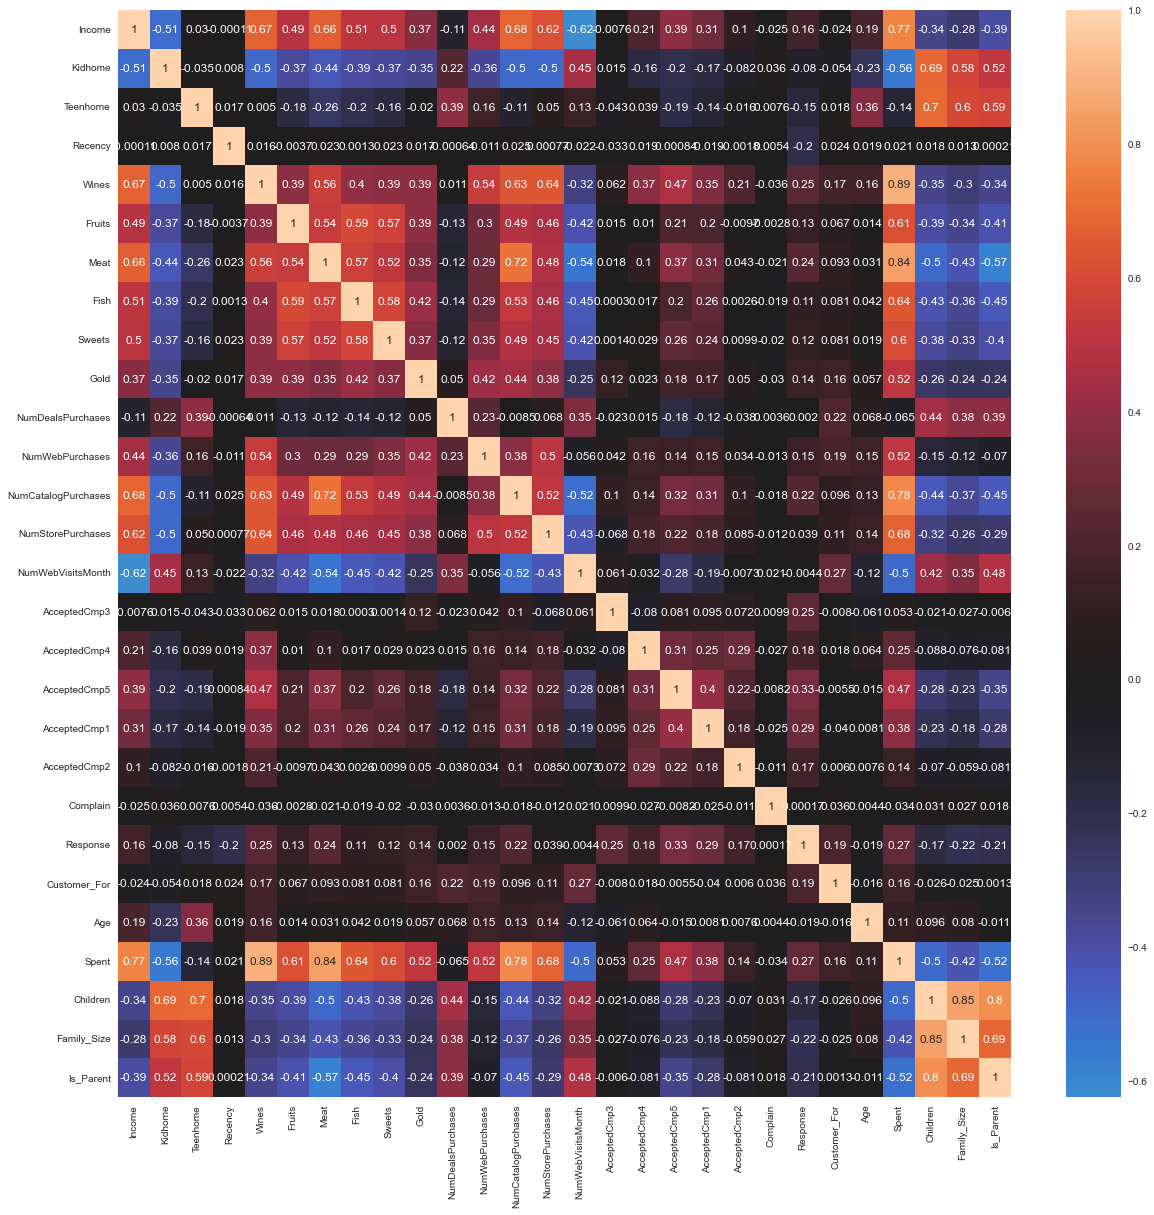

In [466]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

Response variable shows correlation to high spending and customers who acceptcomp5

wines, fish , number of web and catalogue purchaces show relation with high spending customers

parents tend to spend less

Our target customers have to be high spenders . We would further analyse what factors would include high spending customers during our clustering

In [467]:
import datetime
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [468]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print(df.head(5))

   Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0 58138.000        0         0       58    635      88   546   172   
1          0 46344.000        1         1       38     11       1     6     2   
2          0 71613.000        0         0       26    426      49   127   111   
3          0 26646.000        1         0       26     11       4    20    10   
4          1 58293.000        1         0       94    173      43   118    46   

   Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      88    88                  3                8                   10   
1       1     6                  2                1                    1   
2      21    42                  1                8                    2   
3       3     5                  2                2                    0   
4      27    15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  A

Preprocessing Data for Clustering

Converted data into numeric values

In [469]:
df.info()
df['Living_With'].head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   int32  
 1   Income               2236 non-null   float64
 2   Kidhome              2236 non-null   int64  
 3   Teenhome             2236 non-null   int64  
 4   Recency              2236 non-null   int64  
 5   Wines                2236 non-null   int64  
 6   Fruits               2236 non-null   int64  
 7   Meat                 2236 non-null   int64  
 8   Fish                 2236 non-null   int64  
 9   Sweets               2236 non-null   int64  
 10  Gold                 2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   int64  
 12  NumWebPurchases      2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumStorePurchases    2236 non-null   int64  
 15  NumWebVisitsMonth    2236 non-null   i

0    0
1    0
2    1
3    1
4    1
Name: Living_With, dtype: int32

In [470]:
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )


In [471]:
(scaled_ds.head(10))

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Living_With,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
0,-0.894,0.305,-0.825,-0.931,0.307,0.983,1.554,1.680,2.461,1.475,0.846,0.349,1.408,2.510,-0.552,0.693,-1.348,1.530,1.017,1.680,-1.264,-1.759,-1.584
1,-0.894,-0.229,1.033,0.906,-0.384,-0.871,-0.636,-0.713,-0.650,-0.632,-0.730,-0.169,-1.111,-0.569,-1.168,-0.131,-1.348,-1.191,1.273,-0.962,1.395,0.446,0.631
2,-0.894,0.916,-0.825,-0.931,-0.798,0.362,0.572,-0.177,1.345,-0.147,-0.038,-0.686,1.408,-0.227,1.293,-0.544,0.742,-0.207,0.333,0.283,-1.264,-0.657,-1.584
3,-0.894,-1.122,1.033,-0.931,-0.798,-0.871,-0.561,-0.651,-0.504,-0.583,-0.749,-0.169,-0.751,-0.911,-0.552,0.281,0.742,-1.063,-1.291,-0.919,0.065,0.446,0.631
4,0.571,0.312,1.033,-0.931,1.550,-0.390,0.421,-0.217,0.155,-0.002,-0.557,1.384,0.328,0.115,0.063,-0.131,0.742,-0.954,-1.034,-0.306,0.065,0.446,0.631
5,0.571,0.504,-0.825,0.906,-1.144,0.641,0.396,-0.306,-0.687,0.361,-0.576,-0.169,0.688,0.457,1.293,0.281,0.742,-0.301,0.162,0.183,0.065,0.446,0.631
6,-0.894,0.192,-0.825,0.906,-0.522,-0.205,0.975,-0.013,0.228,0.531,-0.326,0.866,1.048,0.115,0.371,0.281,-1.348,1.183,-0.180,-0.027,0.065,-0.657,0.631
7,0.571,-0.813,1.033,-0.931,-0.591,-0.678,-0.410,-0.492,-0.632,-0.632,-0.403,-0.169,-0.032,-0.911,-0.552,1.105,0.742,0.313,-1.376,-0.726,0.065,0.446,0.631
8,0.571,-0.954,1.033,-0.931,-1.040,-0.862,-0.662,-0.634,-0.632,-0.583,-0.807,-0.686,-0.391,-0.911,-1.168,1.517,0.742,0.169,-0.436,-0.931,0.065,0.446,0.631
9,0.571,-2.073,1.033,0.906,0.652,-0.821,-0.662,-0.713,-0.669,-0.632,-0.595,-0.686,-1.111,-0.911,-1.783,6.051,0.742,-1.216,1.615,-0.926,1.395,1.548,0.631


Scaling Data

In [472]:
# dimensionality reduction
# Four dimensions created col1, col2, col3 and col4
# col1, col2 and col3 represents the three axes x, y and z in a graph. col4 is the the size of the plotting in the chart.

In [473]:
pca = PCA(n_components=4)
pca.fit(scaled_ds)
PCA_ds=pd.DataFrame(pca.transform(scaled_ds), columns=(['col1','col2','col3','col4']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.000,-0.000,2.869,-5.945,-2.515,-0.782,2.370,7.451
col2,2236.000,0.000,1.708,-4.189,-1.317,-0.175,1.221,6.139
col3,2236.000,0.000,1.228,-3.576,-0.834,-0.066,0.866,6.669
col4,2236.000,0.000,1.147,-3.132,-0.757,-0.012,0.894,3.368


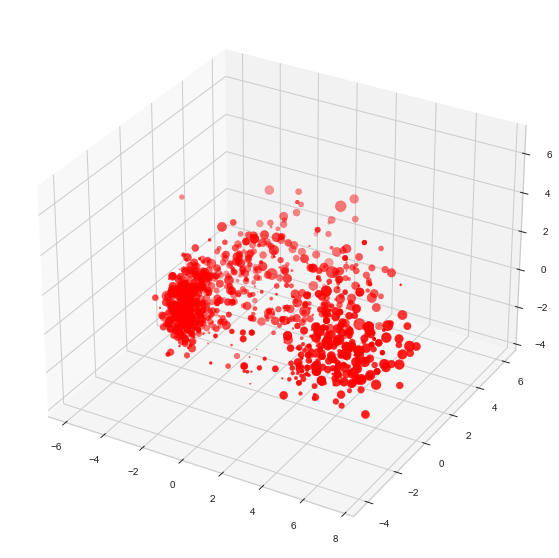

In [474]:
x=PCA_ds['col1']
y=PCA_ds['col2']
z=PCA_ds['col3']
p=PCA_ds['col4']

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax=ax.scatter(x,y,z,s=p*40,c='red', marker='o')
plt.show()

Visual Representation of our PCA component

In [475]:
from yellowbrick.cluster import KElbowVisualizer

In [476]:
# The green line in the plot specifies the time needed by the clustering process 
# Less time with good distortion score is optimal for this dataset, ie 4 optimal clusters

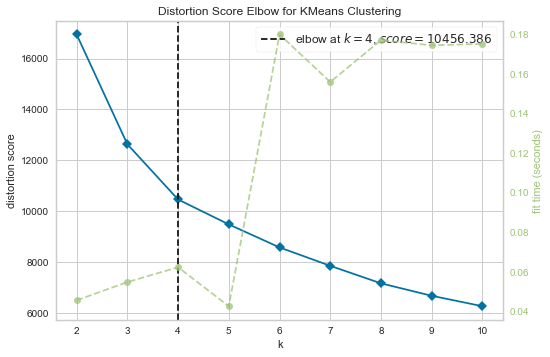

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [477]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [478]:
# Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [479]:
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

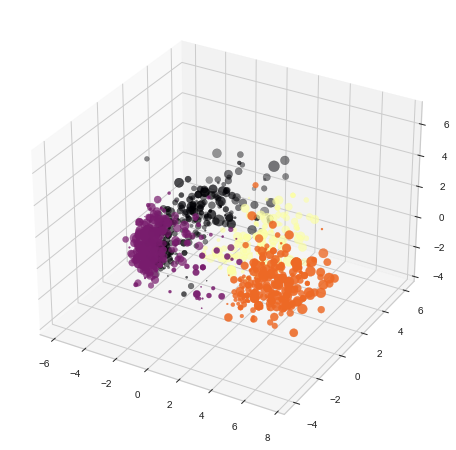

In [480]:
from matplotlib import cm
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=p*40, c=PCA_ds["Clusters"], marker='o',cmap=cm.inferno)
plt.show()

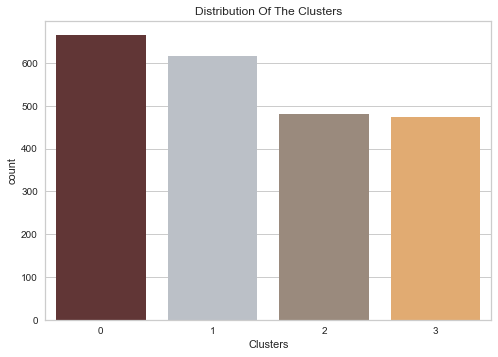

In [481]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Cluster 0 and 1 form our most customers

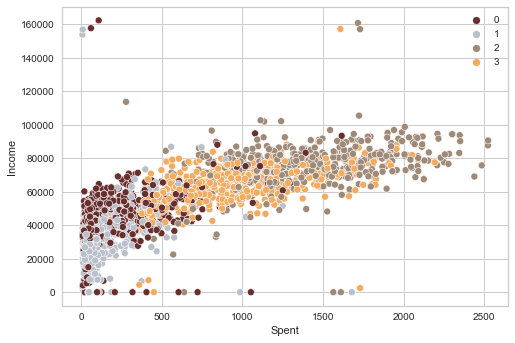

In [482]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
plt.legend()
plt.show()

##### group 3: high spending & average income
##### group 2: high spending & high income
##### group 1: low spending & low income
##### group 0: low spending & average income

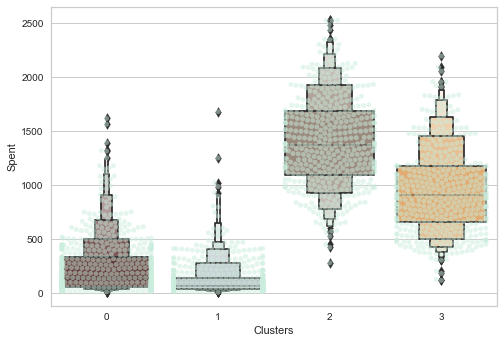

In [483]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()

This indicates clusters 2 and 3 are high spending customers which is consistent with our clusters visualized above

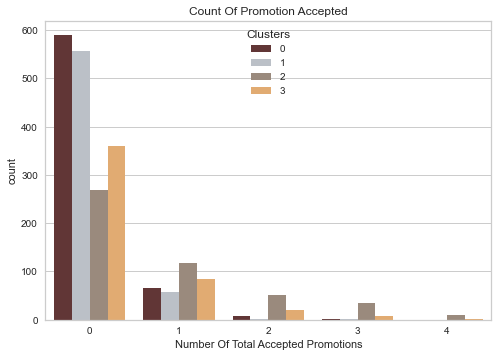

In [484]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [485]:
# Cluster 2 and 3 (high spending) tend to always accept promotions while 0 & 1 clusters dont 

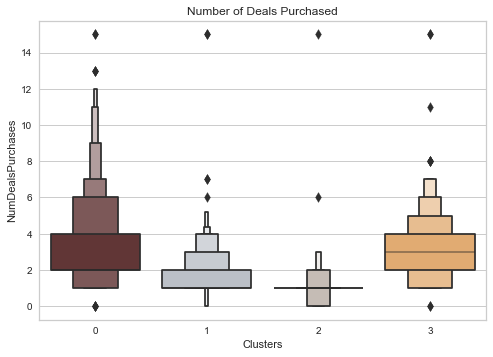

In [486]:
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

In [487]:
# The boxen plots shows how much a person or a family spends if they have a kid at home, teenage at home, age, children atleast 1
# Spent with respect to Education, living_with and the feature customer_for

<Figure size 576x396 with 0 Axes>

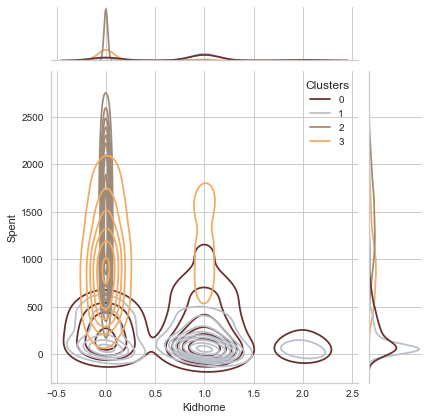

<Figure size 576x396 with 0 Axes>

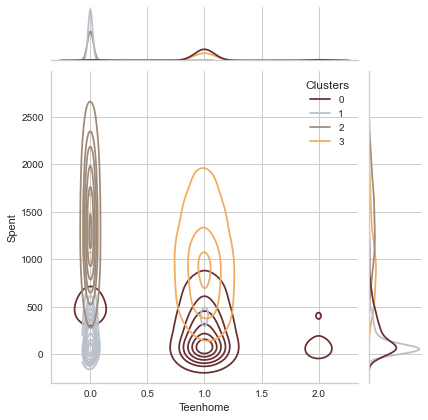

<Figure size 576x396 with 0 Axes>

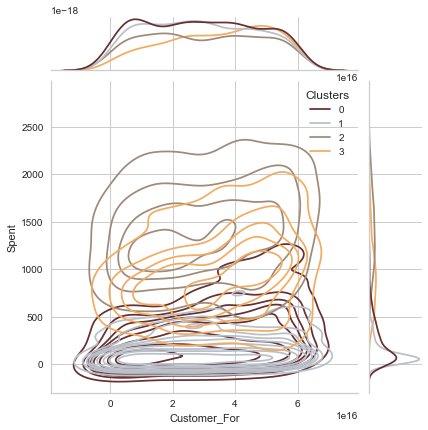

<Figure size 576x396 with 0 Axes>

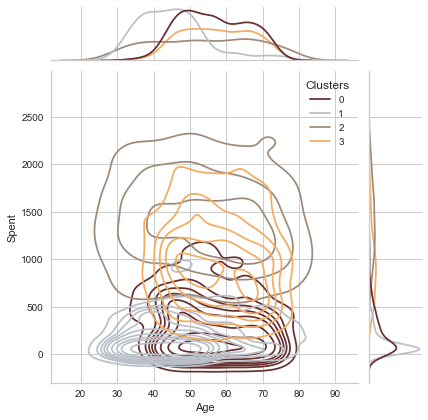

<Figure size 576x396 with 0 Axes>

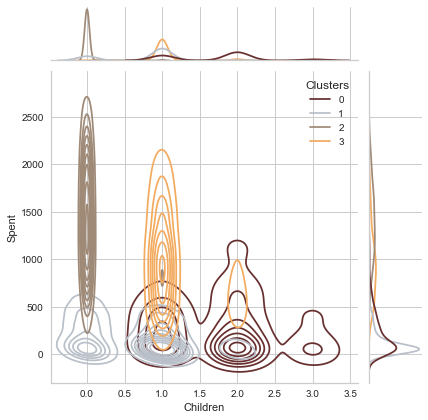

<Figure size 576x396 with 0 Axes>

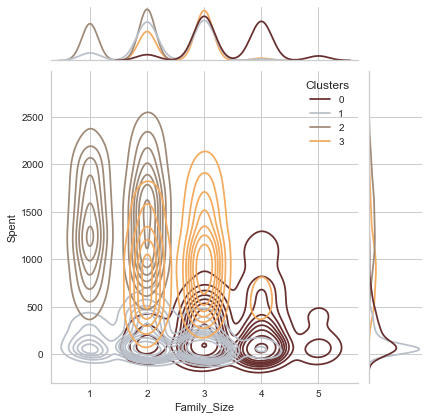

<Figure size 576x396 with 0 Axes>

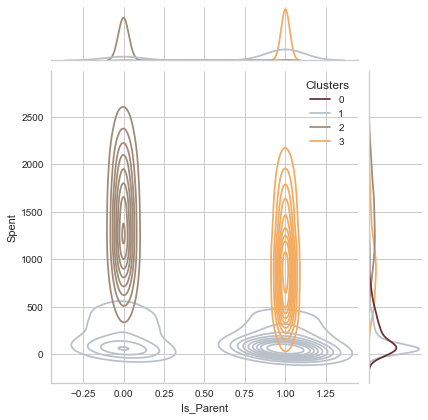

<Figure size 576x396 with 0 Axes>

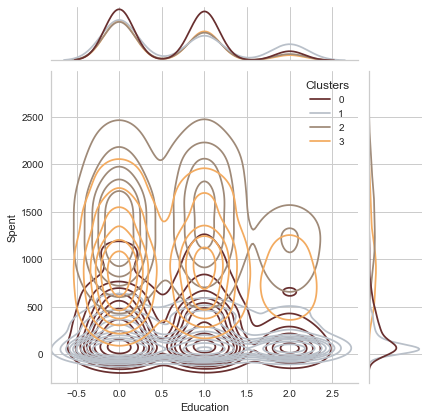

<Figure size 576x396 with 0 Axes>

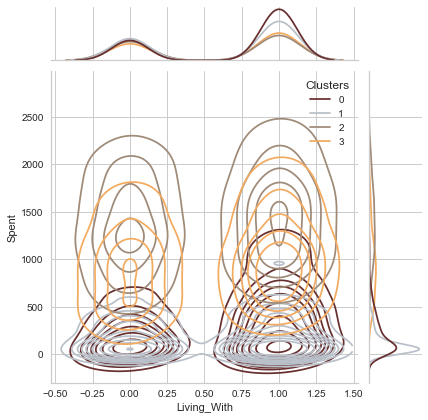

In [488]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

<Figure size 576x396 with 0 Axes>

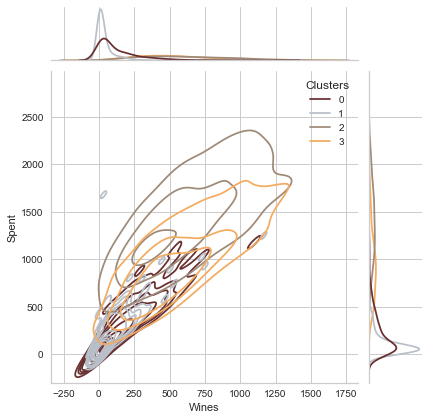

<Figure size 576x396 with 0 Axes>

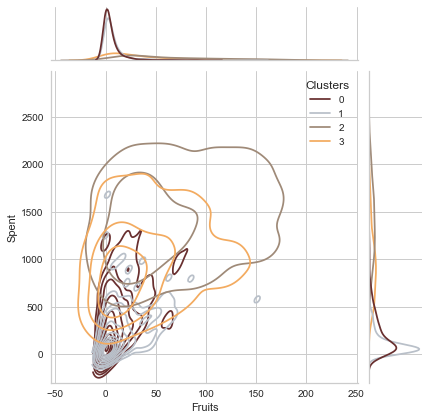

<Figure size 576x396 with 0 Axes>

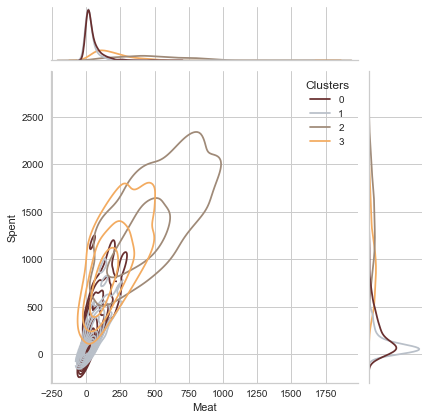

<Figure size 576x396 with 0 Axes>

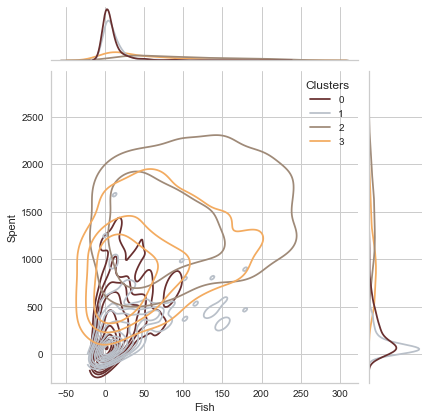

<Figure size 576x396 with 0 Axes>

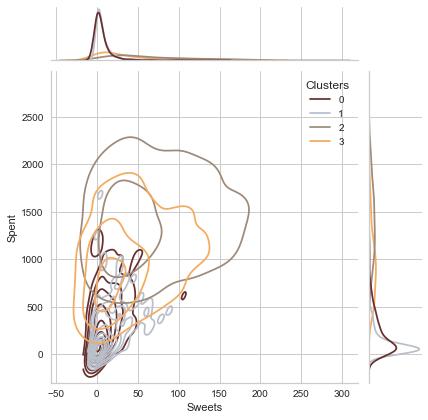

<Figure size 576x396 with 0 Axes>

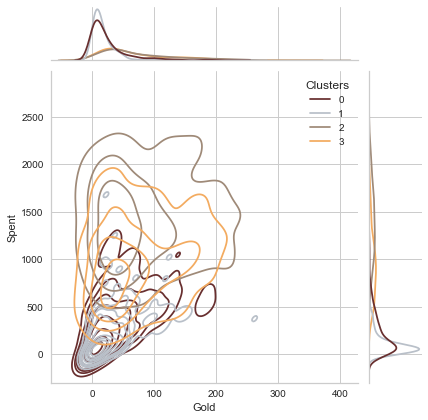

In [489]:
Personal = [ "Wines","Fruits","Meat", "Fish", "Sweets", "Gold"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

The above visualizations help us identify and summarize the profile of each clusters based on their density in the respective feature values

eg - in first graph above, Kidhome is on x-axis we notice that cluster 2 and 3 are more dense at '0' indicating theyre less likely to be parents of kids

but in second graph, cluster 2 is again dense at 0 indicating customers in cluster 2 are definetely not parents. but cluster 1 customer are more likely to have kids but not teenagers at home where as cluster definetely have a teen at home

Such analysis have been drawn from all these plots and summarized in conclusion for profiling below


<AxesSubplot:>

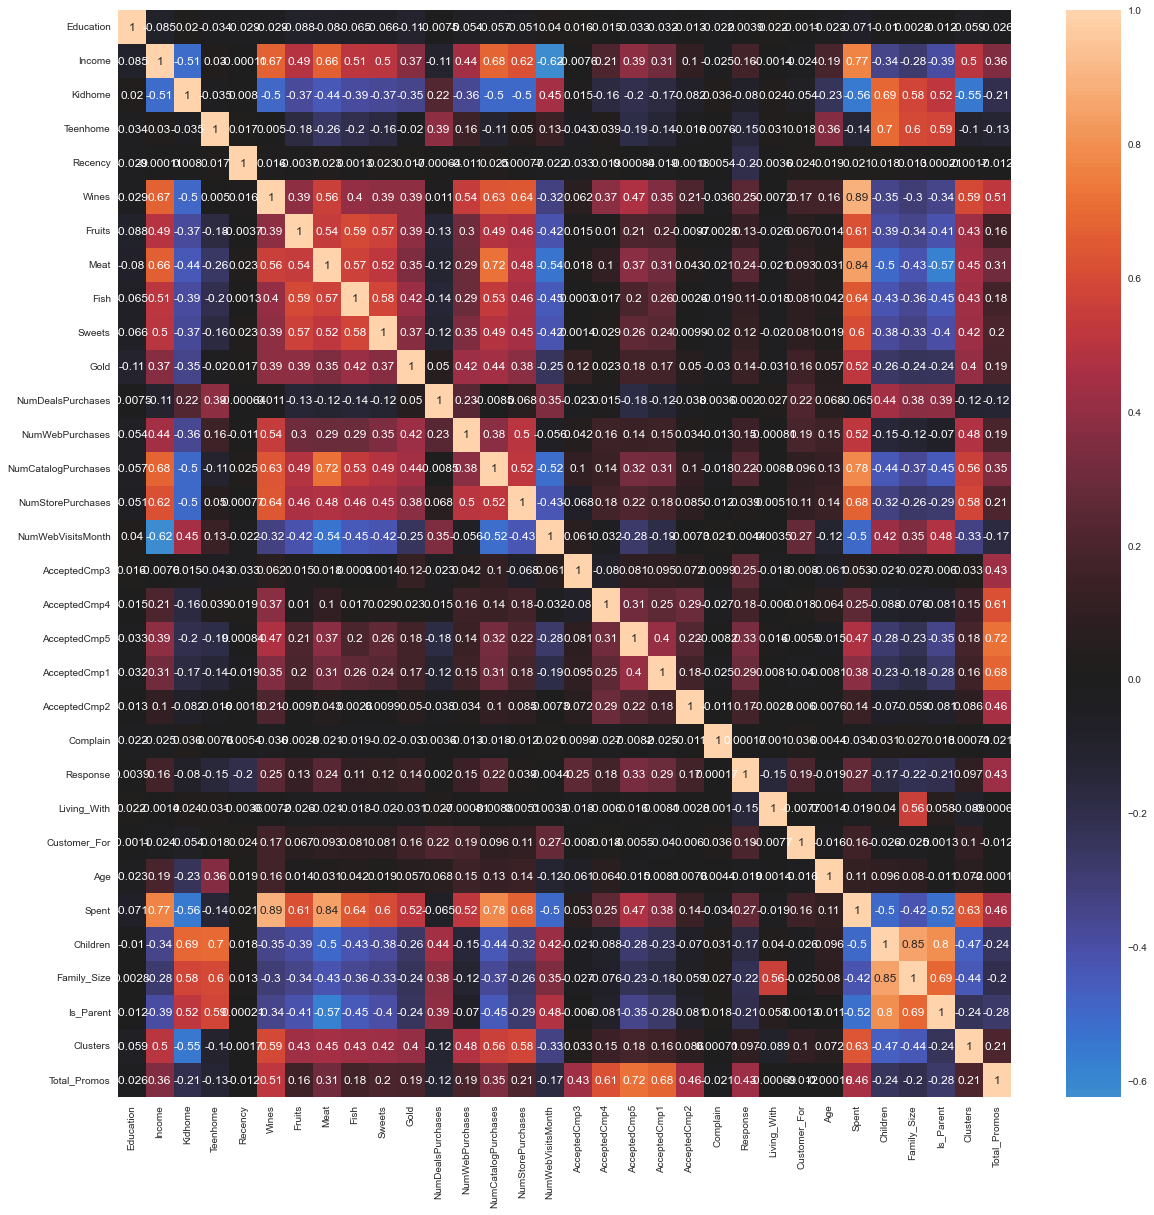

In [490]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

Heatmap to check if the relation in our profiles are consistent with correlation

eg- it can be identified that spent is highly correlated with the sales of different products which was also indicated by the clusters distribution above in jointplots

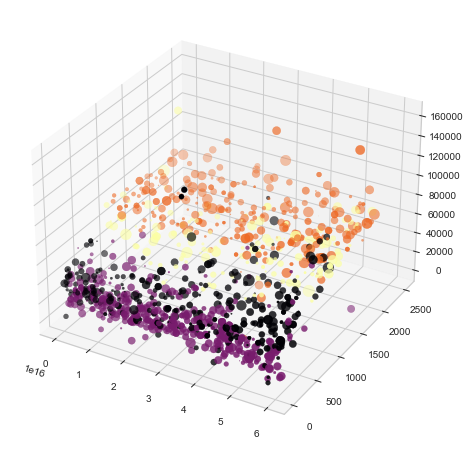

In [491]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter( df['Customer_For'],df['Spent'], df['Income'], s=p*40, c=PCA_ds["Clusters"], marker='o',cmap=cm.inferno)
plt.show()

Visualization of our clusters in 3D

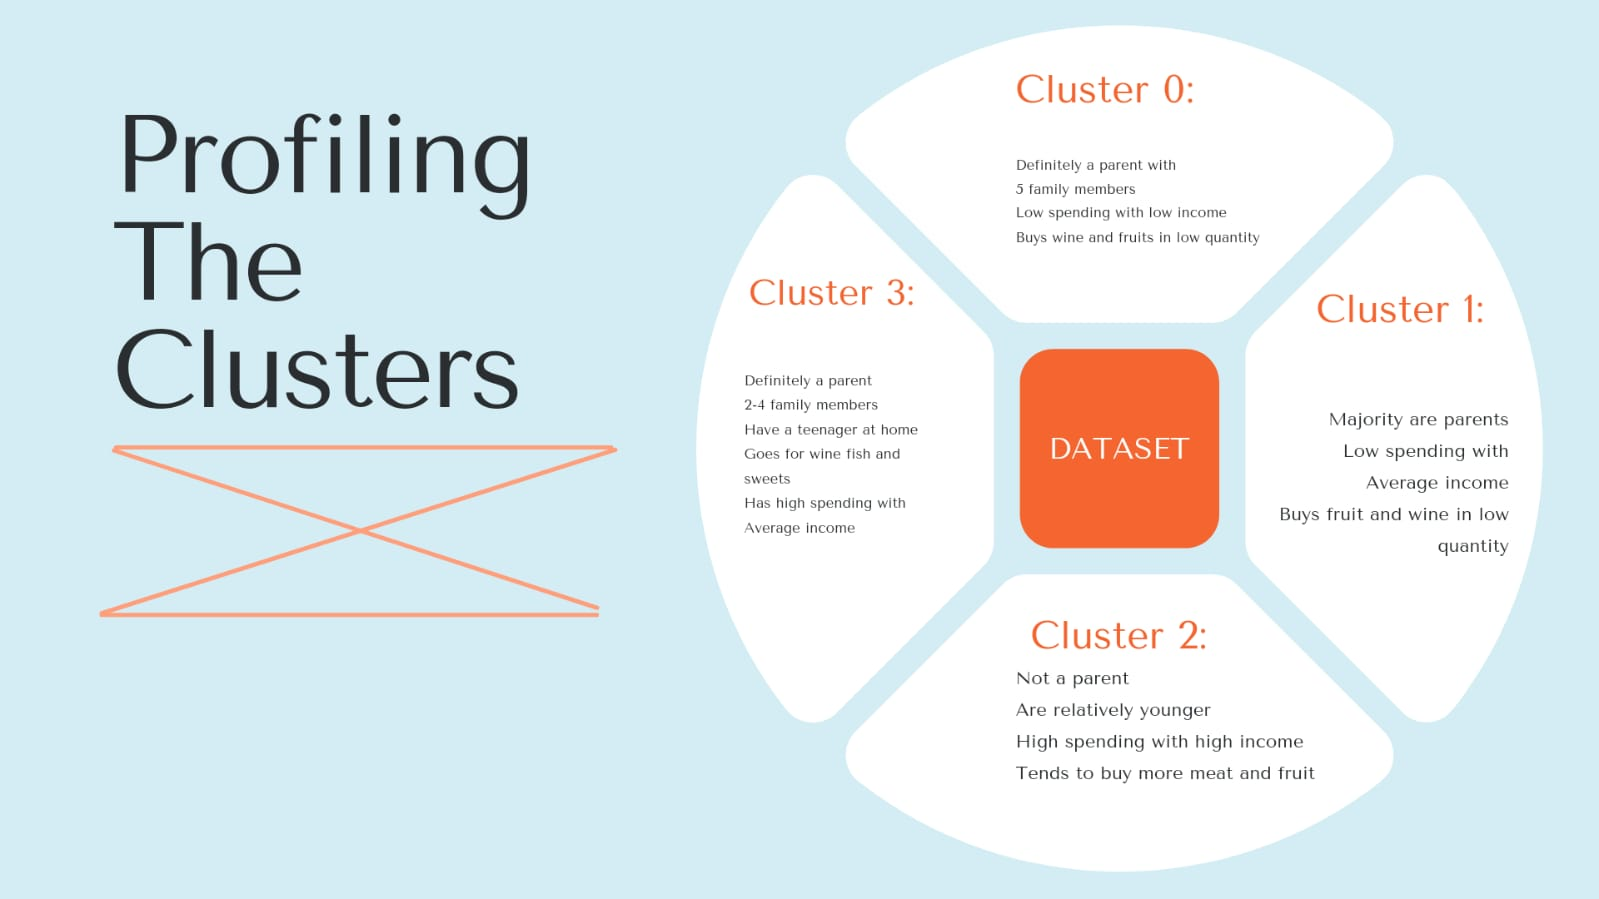

Final conclusion of Customer Profiling

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   int32  
 1   Income               2236 non-null   float64
 2   Kidhome              2236 non-null   int64  
 3   Teenhome             2236 non-null   int64  
 4   Recency              2236 non-null   int64  
 5   Wines                2236 non-null   int64  
 6   Fruits               2236 non-null   int64  
 7   Meat                 2236 non-null   int64  
 8   Fish                 2236 non-null   int64  
 9   Sweets               2236 non-null   int64  
 10  Gold                 2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   int64  
 12  NumWebPurchases      2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumStorePurchases    2236 non-null   int64  
 15  NumWebVisitsMonth    2236 non-null   i

In [493]:
# Starting Apriori algorithm

In [494]:
appriori=['Education','Living_With','Spent','Children','Is_Parent','Wines','Fruits','Meat','Fish','Sweets','Gold','Clusters','Age','Customer_For']

In [495]:
df2=pd.DataFrame()
for i in appriori:
    df2[i]=df[i]

In [496]:
df2.head(20)

,Education,Living_With,Spent,Children,Is_Parent,Wines,Fruits,Meat,Fish,Sweets,Gold,Clusters,Age,Customer_For
0,0,0,1617,0,0,635,88,546,172,88,88,2,65,57283200000000000
1,0,0,27,2,1,11,1,6,2,1,6,0,68,9763200000000000
2,0,1,776,0,0,426,49,127,111,21,42,2,57,26956800000000000
3,0,1,53,1,1,11,4,20,10,3,5,1,38,12009600000000000
4,1,1,422,1,1,173,43,118,46,27,15,1,41,13910400000000000
5,1,1,716,1,1,520,42,98,0,42,14,3,55,25315200000000000
6,0,0,590,1,1,235,65,164,50,49,27,3,51,51235200000000000
7,1,1,169,1,1,76,10,56,3,1,23,1,37,36028800000000000
8,1,1,46,1,1,14,0,24,3,3,2,1,48,33523200000000000
9,1,1,49,2,1,28,0,6,1,1,13,0,72,9331200000000000


In [497]:
df2.Education=df.Education

In [498]:
# Coverting every column into numerical values from categorical

In [499]:
df2.Living_With=df.Living_With.map({0:"Alone",1:'Couple'})

In [500]:
df2.Is_Parent=df.Is_Parent.map({0:"No Child",1:'Has Child'})

In [501]:
df2.head(20)

,Education,Living_With,Spent,Children,Is_Parent,Wines,Fruits,Meat,Fish,Sweets,Gold,Clusters,Age,Customer_For
0,0,Alone,1617,0,No Child,635,88,546,172,88,88,2,65,57283200000000000
1,0,Alone,27,2,Has Child,11,1,6,2,1,6,0,68,9763200000000000
2,0,Couple,776,0,No Child,426,49,127,111,21,42,2,57,26956800000000000
3,0,Couple,53,1,Has Child,11,4,20,10,3,5,1,38,12009600000000000
4,1,Couple,422,1,Has Child,173,43,118,46,27,15,1,41,13910400000000000
5,1,Couple,716,1,Has Child,520,42,98,0,42,14,3,55,25315200000000000
6,0,Alone,590,1,Has Child,235,65,164,50,49,27,3,51,51235200000000000
7,1,Couple,169,1,Has Child,76,10,56,3,1,23,1,37,36028800000000000
8,1,Couple,46,1,Has Child,14,0,24,3,3,2,1,48,33523200000000000
9,1,Couple,49,2,Has Child,28,0,6,1,1,13,0,72,9331200000000000


In [502]:
df2.Clusters=df.Clusters.map({2:'Cluster2',1:'Cluster1',0:'Cluster0',3:'Cluster3'})

In [503]:
df2["Age_Group"]=df["Age"].astype(int)

In [504]:
df2['Age_Group'] = np.select([df2['Age_Group'] <=18 , (df2['Age_Group'] <= 30) & (df2['Age_Group'] > 18),(df2['Age_Group']<60) & (df2['Age_Group']>30), df2['Age_Group']>=60],['Young','Adult','Mature','Senior'],default='none')

In [505]:
df2.head()

,Education,Living_With,Spent,Children,Is_Parent,Wines,Fruits,Meat,Fish,Sweets,Gold,Clusters,Age,Customer_For,Age_Group
0,0,Alone,1617,0,No Child,635,88,546,172,88,88,Cluster2,65,57283200000000000,Senior
1,0,Alone,27,2,Has Child,11,1,6,2,1,6,Cluster0,68,9763200000000000,Senior
2,0,Couple,776,0,No Child,426,49,127,111,21,42,Cluster2,57,26956800000000000,Mature
3,0,Couple,53,1,Has Child,11,4,20,10,3,5,Cluster1,38,12009600000000000,Mature
4,1,Couple,422,1,Has Child,173,43,118,46,27,15,Cluster1,41,13910400000000000,Mature


In [506]:
x=max(df["Customer_For"])
df2["Customer_For"]=df['Customer_For']/x

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   int32  
 1   Income               2236 non-null   float64
 2   Kidhome              2236 non-null   int64  
 3   Teenhome             2236 non-null   int64  
 4   Recency              2236 non-null   int64  
 5   Wines                2236 non-null   int64  
 6   Fruits               2236 non-null   int64  
 7   Meat                 2236 non-null   int64  
 8   Fish                 2236 non-null   int64  
 9   Sweets               2236 non-null   int64  
 10  Gold                 2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   int64  
 12  NumWebPurchases      2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumStorePurchases    2236 non-null   int64  
 15  NumWebVisitsMonth    2236 non-null   i

In [508]:
df2['Customer_For'] = np.select([df2['Customer_For'] <= 0.20, (df2['Customer_For'] <= 0.50) & (df2['Customer_For'] > 0.20),(df2['Customer_For']<0.80) & (df2['Customer_For']>0.50), df2['Customer_For']>=0.80],['New','Exploring','Mature','Regular'],default='none')

In [509]:
df2.head()

,Education,Living_With,Spent,Children,Is_Parent,Wines,Fruits,Meat,Fish,Sweets,Gold,Clusters,Age,Customer_For,Age_Group
0,0,Alone,1617,0,No Child,635,88,546,172,88,88,Cluster2,65,Regular,Senior
1,0,Alone,27,2,Has Child,11,1,6,2,1,6,Cluster0,68,New,Senior
2,0,Couple,776,0,No Child,426,49,127,111,21,42,Cluster2,57,Exploring,Mature
3,0,Couple,53,1,Has Child,11,4,20,10,3,5,Cluster1,38,New,Mature
4,1,Couple,422,1,Has Child,173,43,118,46,27,15,Cluster1,41,Exploring,Mature


In [510]:
df.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Living_With,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Clusters,Total_Promos
count,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000,2236.000
mean,0.610,51401.113,0.444,0.507,49.116,304.127,26.276,166.983,37.536,27.081,43.983,2.326,4.088,2.663,5.796,5.319,0.073,0.075,0.072,0.064,0.013,0.009,0.149,0.645,30566009302325580.000,53.102,605.987,0.951,2.596,0.715,1.342,0.298
std,0.683,22070.942,0.538,0.545,28.957,336.592,39.724,225.690,54.649,41.300,52.062,1.933,2.780,2.924,3.251,2.427,0.260,0.263,0.259,0.246,0.115,0.094,0.357,0.479,17468486839418504.000,11.703,601.865,0.752,0.907,0.451,1.115,0.679
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,26.000,5.000,0.000,1.000,0.000,0.000,0.000
25%,0.000,34686.250,0.000,0.000,24.000,24.000,1.000,16.000,3.000,1.000,9.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,15616800000000000.000,45.000,69.000,0.000,2.000,0.000,0.000,0.000
50%,0.000,51025.500,0.000,0.000,49.000,174.000,8.000,67.000,12.000,8.000,24.000,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,30758400000000000.000,52.000,396.500,1.000,3.000,1.000,1.000,0.000
75%,1.000,68275.750,1.000,1.000,74.000,504.250,33.000,232.000,50.000,33.000,56.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,45705600000000000.000,63.000,1045.500,1.000,3.000,1.000,2.000,0.000
max,2.000,162397.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,263.000,362.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,60393600000000000.000,82.000,2525.000,3.000,5.000,1.000,3.000,4.000


In [511]:
df2['Wines'] = np.select([df2['Wines'] <= 24, (df2['Wines'] <= 174) & (df2['Wines'] > 24),(df2['Wines']<504) & (df2['Wines']>174), df2['Wines']>=504],['Non','Low','Frequent','Biggest'],default='none')


In [512]:
df2['Fruits'] = np.select([df2['Fruits'] <= 1, (df2['Fruits'] <= 8) & (df2['Fruits'] > 1),(df2['Fruits']<33) & (df2['Fruits']>8), df2['Fruits']>=33],['Non','Low','Frequent','Biggest'],default='none')
df2['Meat'] = np.select([df2['Meat'] <= 16, (df2['Meat'] <= 67) & (df2['Meat'] > 16),(df2['Meat']<232) & (df2['Meat']>67), df2['Meat']>=232],['Non','Low','Frequent','Biggest'],default='none')
df2['Fish'] = np.select([df2['Fish'] <= 3, (df2['Fish'] <= 12) & (df2['Fish'] > 3),(df2['Fish']<50) & (df2['Fish']>12), df2['Fish']>=50],['Non','Low','Frequent','Biggest'],default='none')
df2['Sweets'] = np.select([df2['Sweets'] <= 1, (df2['Sweets'] <= 8) & (df2['Sweets'] > 1),(df2['Sweets']<33) & (df2['Sweets']>8), df2['Sweets']>=33],['Non','Low','Frequent','Biggest'],default='none')
df2['Gold'] = np.select([df2['Gold'] <= 9, (df2['Gold'] <= 4) & (df2['Gold'] > 9),(df2['Gold']<56) & (df2['Gold']>4), df2['Gold']>=56],['Non','Low','Frequent','Biggest'],default='none')


In [513]:
df2['Spent'] = np.select([df2['Spent'] <= 69, (df2['Spent'] <= 396) & (df2['Spent'] > 69),(df2['Spent']<1045) & (df2['Spent']>396), df2['Spent']>=1045],['Low','Low-Medium','Medium-High','High'],default='none')

In [514]:
df2.head()

,Education,Living_With,Spent,Children,Is_Parent,Wines,Fruits,Meat,Fish,Sweets,Gold,Clusters,Age,Customer_For,Age_Group
0,0,Alone,High,0,No Child,Biggest,Biggest,Biggest,Biggest,Biggest,Biggest,Cluster2,65,Regular,Senior
1,0,Alone,Low,2,Has Child,Non,Non,Non,Non,Non,Non,Cluster0,68,New,Senior
2,0,Couple,Medium-High,0,No Child,Frequent,Biggest,Frequent,Biggest,Frequent,Frequent,Cluster2,57,Exploring,Mature
3,0,Couple,Low,1,Has Child,Non,Low,Low,Low,Low,Non,Cluster1,38,New,Mature
4,1,Couple,Medium-High,1,Has Child,Low,Biggest,Frequent,Frequent,Frequent,Frequent,Cluster1,41,Exploring,Mature


Dataset has been prepared for Apriori 

In [515]:
from mlxtend.frequent_patterns import apriori, association_rules
#importing apriori with association rules

In [516]:
df2.drop(['Children','Age'],axis=1,inplace=True)

In [517]:
df2.drop(['Education','Living_With'],axis=1,inplace=True)

In [518]:
df2.drop(['Is_Parent'],axis=1,inplace=True)

In [519]:
df2.drop(['Customer_For','Spent','Age_Group'],axis=1,inplace=True)

In [520]:
df2.head()
#Dropped some columns which wasnt necessary for the required buying-patterns now

,Wines,Fruits,Meat,Fish,Sweets,Gold,Clusters
0,Biggest,Biggest,Biggest,Biggest,Biggest,Biggest,Cluster2
1,Non,Non,Non,Non,Non,Non,Cluster0
2,Frequent,Biggest,Frequent,Biggest,Frequent,Frequent,Cluster2
3,Non,Low,Low,Low,Low,Non,Cluster1
4,Low,Biggest,Frequent,Frequent,Frequent,Frequent,Cluster1


In [521]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

association=df2.copy() 
df0 = pd.get_dummies(association)

#Apriori min support
min_support = 0.001

#Max lenght of apriori n-grams
max_len = 10

frequent_items = apriori(df0, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

In [522]:
#rules[::2]

In [523]:
target = 'Wines_Biggest'

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

((results_personnal_care).head(5))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48446,"(Sweets_Frequent, Fish_Biggest, Clusters_Cluster3, Fruits_Non)",(Wines_Biggest),0.001,0.251,0.001,1.000,3.986,0.001,inf
130603,"(Clusters_Cluster3, Sweets_Non, Fruits_Frequent, Fish_Non)","(Meat_Frequent, Wines_Biggest)",0.001,0.089,0.001,1.000,11.236,0.001,inf
123627,"(Fruits_Biggest, Gold_Non, Fish_Frequent, Meat_Biggest)","(Clusters_Cluster2, Wines_Biggest)",0.002,0.125,0.002,1.000,8.014,0.002,inf
134222,"(Fish_Low, Clusters_Cluster3, Fruits_Non, Gold_Frequent, Meat_Frequent)",(Wines_Biggest),0.001,0.251,0.001,1.000,3.986,0.001,inf
123619,"(Clusters_Cluster2, Fruits_Biggest, Gold_Non, Fish_Frequent)","(Wines_Biggest, Meat_Biggest)",0.002,0.147,0.002,1.000,6.796,0.002,inf


Here we are searching for biggest consumers of wine out of all the rules generated to find frequent patterns based on antecedents.

step repeated for all other products below

In [524]:
target = 'Meat_Biggest'

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_personnal_care.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
215784,"(Clusters_Cluster2, Fish_Biggest, Wines_Low, Fruits_Biggest, Gold_Frequent, Sweets_Biggest)",(Meat_Biggest),0.002,0.250,0.002,1.000,3.993,0.001,inf
32086,"(Sweets_Frequent, Fish_Biggest, Fruits_Non)",(Meat_Biggest),0.003,0.250,0.003,1.000,3.993,0.002,inf
66189,"(Sweets_Biggest, Fish_Biggest, Wines_Frequent, Gold_Non)",(Meat_Biggest),0.001,0.250,0.001,1.000,3.993,0.001,inf
49735,"(Sweets_Biggest, Gold_Non, Fish_Frequent, Wines_Biggest)",(Meat_Biggest),0.004,0.250,0.004,1.000,3.993,0.003,inf
192701,"(Clusters_Cluster2, Fish_Biggest, Sweets_Non, Fruits_Biggest, Gold_Frequent)",(Meat_Biggest),0.003,0.250,0.003,1.000,3.993,0.002,inf


In [525]:
target = 'Fruits_Biggest'

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_personnal_care.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24621,"(Clusters_Cluster3, Fish_Low, Meat_Biggest)",(Fruits_Biggest),0.001,0.252,0.001,1.000,3.965,0.001,inf
211216,"(Gold_Biggest, Clusters_Cluster2, Sweets_Biggest, Wines_Frequent, Fish_Frequent, Meat_Frequent)",(Fruits_Biggest),0.001,0.252,0.001,1.000,3.965,0.001,inf
139920,"(Clusters_Cluster3, Wines_Frequent, Fish_Non, Meat_Biggest, Sweets_Biggest)",(Fruits_Biggest),0.002,0.252,0.002,1.000,3.965,0.001,inf
139924,"(Wines_Frequent, Clusters_Cluster3, Fish_Non, Meat_Biggest)","(Sweets_Biggest, Fruits_Biggest)",0.002,0.174,0.002,1.000,5.763,0.001,inf
139979,"(Gold_Biggest, Clusters_Cluster3, Wines_Frequent, Fish_Non, Meat_Biggest)",(Fruits_Biggest),0.002,0.252,0.002,1.000,3.965,0.001,inf


In [526]:
target = 'Fish_Biggest'

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_personnal_care.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
117595,"(Clusters_Cluster2, Sweets_Frequent, Gold_Frequent, Fruits_Non)",(Fish_Biggest),0.002,0.252,0.002,1.000,3.965,0.001,inf
138949,"(Gold_Biggest, Sweets_Non, Wines_Frequent, Fruits_Biggest, Meat_Biggest)",(Fish_Biggest),0.002,0.252,0.002,1.000,3.965,0.001,inf
60651,"(Meat_Biggest, Wines_Frequent, Sweets_Biggest, Fruits_Low)",(Fish_Biggest),0.001,0.252,0.001,1.000,3.965,0.001,inf
60657,"(Meat_Biggest, Wines_Frequent, Fruits_Low)","(Fish_Biggest, Sweets_Biggest)",0.001,0.180,0.001,1.000,5.562,0.001,inf
62682,"(Clusters_Cluster2, Wines_Frequent, Sweets_Biggest, Fruits_Low)",(Fish_Biggest),0.001,0.252,0.001,1.000,3.965,0.001,inf


In [527]:
target = 'Sweets_Biggest'

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_personnal_care.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
154994,"(Gold_Biggest, Fish_Biggest, Clusters_Cluster3, Wines_Frequent, Fruits_Non)",(Sweets_Biggest),0.001,0.254,0.001,1.000,3.944,0.001,inf
54382,"(Clusters_Cluster0, Wines_Frequent, Fruits_Biggest, Meat_Biggest)",(Sweets_Biggest),0.002,0.254,0.002,1.000,3.944,0.001,inf
114646,"(Fish_Biggest, Clusters_Cluster3, Meat_Frequent, Fruits_Non)",(Sweets_Biggest),0.002,0.254,0.002,1.000,3.944,0.002,inf
31857,"(Clusters_Cluster2, Gold_Frequent, Fruits_Low)",(Sweets_Biggest),0.001,0.254,0.001,1.000,3.944,0.001,inf
156271,"(Wines_Frequent, Clusters_Cluster3, Fish_Non, Meat_Biggest)","(Gold_Biggest, Sweets_Biggest)",0.002,0.129,0.002,1.000,7.764,0.002,inf


In [528]:
target = 'Gold_Biggest'

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_personnal_care.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56507,"(Wines_Frequent, Clusters_Cluster3, Fruits_Biggest, Fish_Non)",(Gold_Biggest),0.002,0.253,0.002,1.000,3.951,0.001,inf
139993,"(Wines_Frequent, Clusters_Cluster3, Fruits_Biggest, Fish_Non)","(Gold_Biggest, Meat_Biggest)",0.002,0.124,0.002,1.000,8.043,0.002,inf
83091,"(Wines_Low, Sweets_Biggest, Fish_Frequent, Meat_Biggest)",(Gold_Biggest),0.002,0.253,0.002,1.000,3.951,0.002,inf
69624,"(Wines_Frequent, Sweets_Non, Fish_Frequent, Meat_Low)",(Gold_Biggest),0.002,0.253,0.002,1.000,3.951,0.001,inf
56461,"(Wines_Frequent, Fruits_Biggest, Fish_Non)","(Gold_Biggest, Sweets_Biggest)",0.002,0.129,0.002,1.000,7.764,0.002,inf
